## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 1.0013698	total: 57.3ms	remaining: 57.2s
1:	learn: 0.9825687	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9624621	total: 59.4ms	remaining: 19.8s
3:	learn: 0.9470059	total: 60.4ms	remaining: 15s
4:	learn: 0.9287399	total: 61.4ms	remaining: 12.2s
5:	learn: 0.9107063	total: 62.2ms	remaining: 10.3s
6:	learn: 0.8942237	total: 63.2ms	remaining: 8.97s
7:	learn: 0.8778562	total: 64.2ms	remaining: 7.96s
8:	learn: 0.8623769	total: 65.1ms	remaining: 7.17s
9:	learn: 0.8455855	total: 66ms	remaining: 6.53s
10:	learn: 0.8300368	total: 66.8ms	remaining: 6.01s
11:	learn: 0.8145210	total: 67.5ms	remaining: 5.56s
12:	learn: 0.7998481	total: 68.4ms	remaining: 5.19s
13:	learn: 0.7849661	total: 69.2ms	remaining: 4.87s
14:	learn: 0.7728694	total: 70ms	remaining: 4.6s
15:	learn: 0.7597336	total: 70.9ms	remaining: 4.36s
16:	learn: 0.7470039	total: 71.7ms	remaining: 4.15s
17:	learn: 0.7354459	total: 72.5ms	remaining: 3.96s
18:	learn: 0.7231029	total: 73.4ms	remaining: 3.79s

57:	learn: 0.4353152	total: 107ms	remaining: 1.73s
58:	learn: 0.4320907	total: 108ms	remaining: 1.72s
59:	learn: 0.4281334	total: 108ms	remaining: 1.7s
60:	learn: 0.4238238	total: 109ms	remaining: 1.68s
61:	learn: 0.4198371	total: 110ms	remaining: 1.67s
62:	learn: 0.4165893	total: 111ms	remaining: 1.65s
63:	learn: 0.4122710	total: 112ms	remaining: 1.64s
64:	learn: 0.4087572	total: 113ms	remaining: 1.62s
65:	learn: 0.4053906	total: 114ms	remaining: 1.61s
66:	learn: 0.4017318	total: 115ms	remaining: 1.6s
67:	learn: 0.3975722	total: 116ms	remaining: 1.58s
68:	learn: 0.3946618	total: 117ms	remaining: 1.57s
69:	learn: 0.3913368	total: 118ms	remaining: 1.56s
70:	learn: 0.3874292	total: 119ms	remaining: 1.55s
71:	learn: 0.3837896	total: 120ms	remaining: 1.54s
72:	learn: 0.3807269	total: 121ms	remaining: 1.53s
73:	learn: 0.3777381	total: 122ms	remaining: 1.52s
74:	learn: 0.3746863	total: 122ms	remaining: 1.51s
75:	learn: 0.3723845	total: 124ms	remaining: 1.5s
76:	learn: 0.3698479	total: 125ms	

134:	learn: 0.2776991	total: 177ms	remaining: 1.13s
135:	learn: 0.2762120	total: 177ms	remaining: 1.13s
136:	learn: 0.2754953	total: 178ms	remaining: 1.12s
137:	learn: 0.2741406	total: 179ms	remaining: 1.12s
138:	learn: 0.2730971	total: 180ms	remaining: 1.11s
139:	learn: 0.2719170	total: 181ms	remaining: 1.11s
140:	learn: 0.2709709	total: 182ms	remaining: 1.11s
141:	learn: 0.2698682	total: 183ms	remaining: 1.1s
142:	learn: 0.2689428	total: 184ms	remaining: 1.1s
143:	learn: 0.2682123	total: 184ms	remaining: 1.09s
144:	learn: 0.2672367	total: 185ms	remaining: 1.09s
145:	learn: 0.2662218	total: 186ms	remaining: 1.09s
146:	learn: 0.2654601	total: 187ms	remaining: 1.08s
147:	learn: 0.2647490	total: 188ms	remaining: 1.08s
148:	learn: 0.2636258	total: 189ms	remaining: 1.08s
149:	learn: 0.2628752	total: 189ms	remaining: 1.07s
150:	learn: 0.2620119	total: 190ms	remaining: 1.07s
151:	learn: 0.2611285	total: 191ms	remaining: 1.07s
152:	learn: 0.2603981	total: 192ms	remaining: 1.06s
153:	learn: 0.

257:	learn: 0.1991419	total: 282ms	remaining: 810ms
258:	learn: 0.1986648	total: 283ms	remaining: 808ms
259:	learn: 0.1982965	total: 283ms	remaining: 806ms
260:	learn: 0.1977869	total: 284ms	remaining: 805ms
261:	learn: 0.1974445	total: 285ms	remaining: 803ms
262:	learn: 0.1971258	total: 286ms	remaining: 802ms
263:	learn: 0.1966012	total: 287ms	remaining: 800ms
264:	learn: 0.1959449	total: 288ms	remaining: 798ms
265:	learn: 0.1955510	total: 289ms	remaining: 796ms
266:	learn: 0.1952195	total: 289ms	remaining: 795ms
267:	learn: 0.1944984	total: 290ms	remaining: 793ms
268:	learn: 0.1940357	total: 291ms	remaining: 791ms
269:	learn: 0.1934998	total: 292ms	remaining: 789ms
270:	learn: 0.1930382	total: 293ms	remaining: 788ms
271:	learn: 0.1925598	total: 294ms	remaining: 786ms
272:	learn: 0.1919416	total: 295ms	remaining: 784ms
273:	learn: 0.1915292	total: 295ms	remaining: 783ms
274:	learn: 0.1913344	total: 296ms	remaining: 781ms
275:	learn: 0.1909943	total: 297ms	remaining: 779ms
276:	learn: 

359:	learn: 0.1581177	total: 367ms	remaining: 653ms
360:	learn: 0.1577712	total: 368ms	remaining: 652ms
361:	learn: 0.1575195	total: 369ms	remaining: 650ms
362:	learn: 0.1573000	total: 370ms	remaining: 649ms
363:	learn: 0.1570365	total: 371ms	remaining: 648ms
364:	learn: 0.1566875	total: 372ms	remaining: 646ms
365:	learn: 0.1563772	total: 372ms	remaining: 645ms
366:	learn: 0.1559785	total: 373ms	remaining: 644ms
367:	learn: 0.1557883	total: 374ms	remaining: 642ms
368:	learn: 0.1555114	total: 375ms	remaining: 641ms
369:	learn: 0.1552074	total: 376ms	remaining: 640ms
370:	learn: 0.1550731	total: 377ms	remaining: 639ms
371:	learn: 0.1546911	total: 377ms	remaining: 637ms
372:	learn: 0.1543676	total: 378ms	remaining: 636ms
373:	learn: 0.1541256	total: 379ms	remaining: 634ms
374:	learn: 0.1538226	total: 380ms	remaining: 633ms
375:	learn: 0.1533925	total: 380ms	remaining: 631ms
376:	learn: 0.1530145	total: 381ms	remaining: 630ms
377:	learn: 0.1527395	total: 382ms	remaining: 629ms
378:	learn: 

462:	learn: 0.1303107	total: 456ms	remaining: 528ms
463:	learn: 0.1299470	total: 457ms	remaining: 528ms
464:	learn: 0.1298924	total: 458ms	remaining: 526ms
465:	learn: 0.1297966	total: 458ms	remaining: 525ms
466:	learn: 0.1297368	total: 459ms	remaining: 524ms
467:	learn: 0.1296575	total: 460ms	remaining: 523ms
468:	learn: 0.1293836	total: 461ms	remaining: 522ms
469:	learn: 0.1291184	total: 462ms	remaining: 521ms
470:	learn: 0.1289349	total: 463ms	remaining: 519ms
471:	learn: 0.1287546	total: 463ms	remaining: 518ms
472:	learn: 0.1285224	total: 464ms	remaining: 517ms
473:	learn: 0.1282967	total: 465ms	remaining: 516ms
474:	learn: 0.1281270	total: 466ms	remaining: 515ms
475:	learn: 0.1280593	total: 467ms	remaining: 514ms
476:	learn: 0.1277987	total: 467ms	remaining: 513ms
477:	learn: 0.1277669	total: 468ms	remaining: 511ms
478:	learn: 0.1277112	total: 469ms	remaining: 510ms
479:	learn: 0.1274618	total: 470ms	remaining: 509ms
480:	learn: 0.1272108	total: 471ms	remaining: 508ms
481:	learn: 

566:	learn: 0.1115230	total: 542ms	remaining: 414ms
567:	learn: 0.1113126	total: 542ms	remaining: 413ms
568:	learn: 0.1111713	total: 543ms	remaining: 412ms
569:	learn: 0.1111407	total: 544ms	remaining: 411ms
570:	learn: 0.1109391	total: 545ms	remaining: 409ms
571:	learn: 0.1107729	total: 546ms	remaining: 408ms
572:	learn: 0.1105687	total: 547ms	remaining: 407ms
573:	learn: 0.1103345	total: 547ms	remaining: 406ms
574:	learn: 0.1100563	total: 548ms	remaining: 405ms
575:	learn: 0.1099409	total: 549ms	remaining: 404ms
576:	learn: 0.1097782	total: 550ms	remaining: 403ms
577:	learn: 0.1095782	total: 551ms	remaining: 402ms
578:	learn: 0.1095426	total: 552ms	remaining: 401ms
579:	learn: 0.1093639	total: 553ms	remaining: 400ms
580:	learn: 0.1090971	total: 553ms	remaining: 399ms
581:	learn: 0.1089836	total: 554ms	remaining: 398ms
582:	learn: 0.1087381	total: 555ms	remaining: 397ms
583:	learn: 0.1084960	total: 556ms	remaining: 396ms
584:	learn: 0.1082784	total: 557ms	remaining: 395ms
585:	learn: 

689:	learn: 0.0911425	total: 646ms	remaining: 290ms
690:	learn: 0.0908739	total: 647ms	remaining: 289ms
691:	learn: 0.0906352	total: 648ms	remaining: 288ms
692:	learn: 0.0906115	total: 649ms	remaining: 287ms
693:	learn: 0.0904439	total: 649ms	remaining: 286ms
694:	learn: 0.0902779	total: 650ms	remaining: 285ms
695:	learn: 0.0901788	total: 651ms	remaining: 284ms
696:	learn: 0.0900914	total: 652ms	remaining: 284ms
697:	learn: 0.0899525	total: 653ms	remaining: 283ms
698:	learn: 0.0897620	total: 654ms	remaining: 282ms
699:	learn: 0.0897480	total: 655ms	remaining: 281ms
700:	learn: 0.0895722	total: 656ms	remaining: 280ms
701:	learn: 0.0894046	total: 656ms	remaining: 279ms
702:	learn: 0.0891892	total: 657ms	remaining: 278ms
703:	learn: 0.0890619	total: 658ms	remaining: 277ms
704:	learn: 0.0889586	total: 659ms	remaining: 276ms
705:	learn: 0.0888670	total: 660ms	remaining: 275ms
706:	learn: 0.0887511	total: 661ms	remaining: 274ms
707:	learn: 0.0886041	total: 662ms	remaining: 273ms
708:	learn: 

791:	learn: 0.0793484	total: 732ms	remaining: 192ms
792:	learn: 0.0792531	total: 733ms	remaining: 191ms
793:	learn: 0.0792364	total: 734ms	remaining: 190ms
794:	learn: 0.0792253	total: 735ms	remaining: 189ms
795:	learn: 0.0791281	total: 735ms	remaining: 188ms
796:	learn: 0.0790218	total: 736ms	remaining: 188ms
797:	learn: 0.0788801	total: 737ms	remaining: 187ms
798:	learn: 0.0787936	total: 738ms	remaining: 186ms
799:	learn: 0.0786901	total: 739ms	remaining: 185ms
800:	learn: 0.0785916	total: 740ms	remaining: 184ms
801:	learn: 0.0784340	total: 741ms	remaining: 183ms
802:	learn: 0.0783984	total: 742ms	remaining: 182ms
803:	learn: 0.0782351	total: 742ms	remaining: 181ms
804:	learn: 0.0780810	total: 743ms	remaining: 180ms
805:	learn: 0.0779839	total: 744ms	remaining: 179ms
806:	learn: 0.0779557	total: 745ms	remaining: 178ms
807:	learn: 0.0778672	total: 746ms	remaining: 177ms
808:	learn: 0.0777347	total: 747ms	remaining: 176ms
809:	learn: 0.0776639	total: 748ms	remaining: 175ms
810:	learn: 

916:	learn: 0.0675632	total: 837ms	remaining: 75.7ms
917:	learn: 0.0674946	total: 838ms	remaining: 74.8ms
918:	learn: 0.0674024	total: 838ms	remaining: 73.9ms
919:	learn: 0.0672400	total: 839ms	remaining: 73ms
920:	learn: 0.0671652	total: 840ms	remaining: 72.1ms
921:	learn: 0.0670738	total: 842ms	remaining: 71.2ms
922:	learn: 0.0670591	total: 842ms	remaining: 70.3ms
923:	learn: 0.0670460	total: 843ms	remaining: 69.4ms
924:	learn: 0.0670378	total: 844ms	remaining: 68.4ms
925:	learn: 0.0668950	total: 845ms	remaining: 67.5ms
926:	learn: 0.0668113	total: 846ms	remaining: 66.6ms
927:	learn: 0.0667037	total: 847ms	remaining: 65.7ms
928:	learn: 0.0665788	total: 848ms	remaining: 64.8ms
929:	learn: 0.0664112	total: 848ms	remaining: 63.9ms
930:	learn: 0.0662825	total: 849ms	remaining: 62.9ms
931:	learn: 0.0661094	total: 850ms	remaining: 62ms
932:	learn: 0.0659946	total: 851ms	remaining: 61.1ms
933:	learn: 0.0658660	total: 852ms	remaining: 60.2ms
934:	learn: 0.0657976	total: 852ms	remaining: 59.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

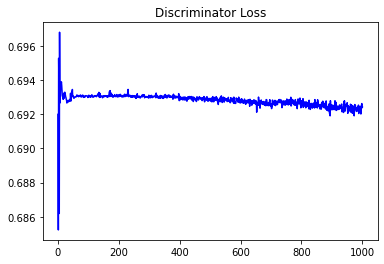

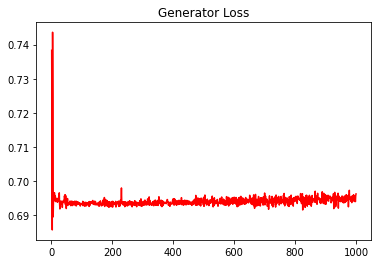

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07890816195287084


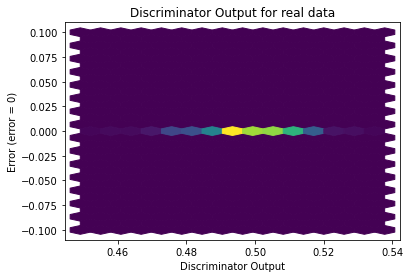

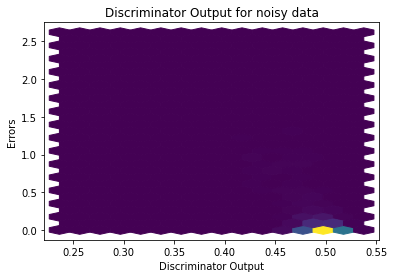

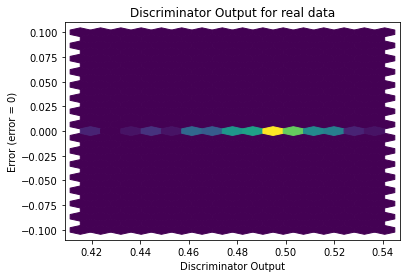

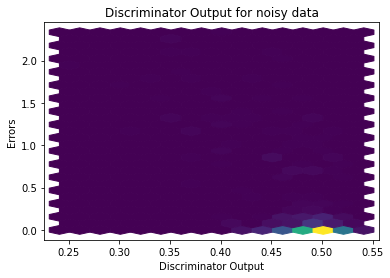

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


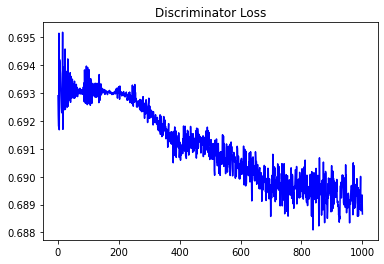

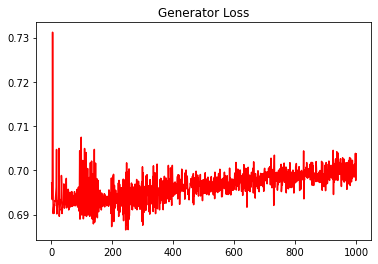

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08003802629967406


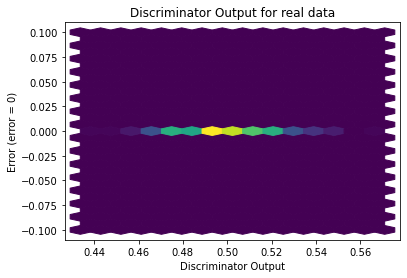

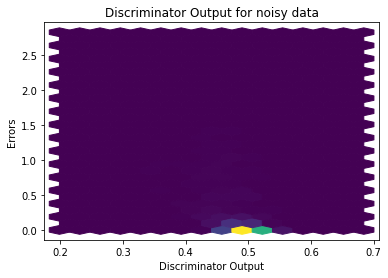

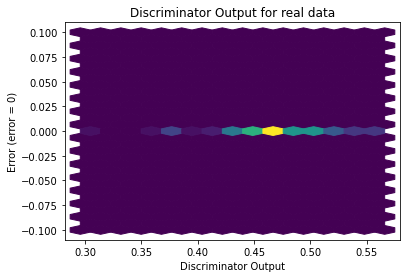

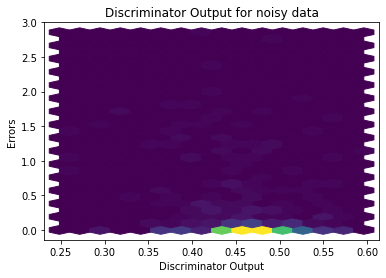

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2196]], requires_grad=True)
